In [3]:
import pandas as pd

df = pd.read_csv("PRICE_AND_DEMAND_201801_NSW1.csv")

print("Shape:", df.shape)
df.head()


Shape: (1488, 5)


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018/01/01 00:30:00,6912.25,91.86,TRADE
1,NSW1,2018/01/01 01:00:00,6745.63,88.83,TRADE
2,NSW1,2018/01/01 01:30:00,6466.06,73.62,TRADE
3,NSW1,2018/01/01 02:00:00,6279.80,71.49,TRADE
4,NSW1,2018/01/01 02:30:00,6177.31,69.27,TRADE


In [4]:
df['SETTLEMENTDATE'] = pd.to_datetime(
    df['SETTLEMENTDATE'],
    dayfirst=True,
    errors='coerce'
)

print("NaT values:", df['SETTLEMENTDATE'].isna().sum())


NaT values: 912


In [5]:
import pandas as pd

df = pd.read_csv("PRICE_AND_DEMAND_201801_NSW1.csv")


In [6]:
df['SETTLEMENTDATE'].head()


,SETTLEMENTDATE
0,2018/01/01 00:30:00
1,2018/01/01 01:00:00
2,2018/01/01 01:30:00
3,2018/01/01 02:00:00
4,2018/01/01 02:30:00


In [7]:
df['SETTLEMENTDATE'] = pd.to_datetime(
    df['SETTLEMENTDATE'],
    format='%Y/%m/%d %H:%M:%S',
    errors='coerce'
)

print("NaT values:", df['SETTLEMENTDATE'].isna().sum())


NaT values: 0


In [8]:
df = df.sort_values('SETTLEMENTDATE')
df = df.set_index('SETTLEMENTDATE')

print("Start:", df.index.min())
print("End:", df.index.max())
print("Total rows:", len(df))


Start: 2018-01-01 00:30:00
End: 2018-02-01 00:00:00
Total rows: 1488


In [9]:
format='%Y/%m/%d %H:%M:%S'


In [10]:
# Keep only NSW1
df = df[df['REGION'] == 'NSW1']

# Optional: check for missing timestamps
expected_len = 31 * 24 * 2  # 31 days * 24 hours * 2 half-hourly intervals
print("Expected rows:", expected_len)
print("Actual rows:", len(df))

# Split data
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Expected rows: 1488
Actual rows: 1488
Train shape: (1190, 4)
Test shape: (298, 4)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Quick overview

Check for basic statistics: min, max, mean, std.

Check data types and missing values.

In [12]:
print(df.describe())
print(df.info())


        TOTALDEMAND          RRP
count   1488.000000  1488.000000
mean    8364.867251    76.020121
std     1441.819104    19.154113
min     5910.060000    40.560000
25%     7220.160000    61.750000
50%     8205.285000    69.940000
75%     9383.370000    86.495000
max    12494.580000   234.860000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1488 entries, 2018-01-01 00:30:00 to 2018-02-01 00:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       1488 non-null   object 
 1   TOTALDEMAND  1488 non-null   float64
 2   RRP          1488 non-null   float64
 3   PERIODTYPE   1488 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.1+ KB
None


# Plot Total Demand over January

This shows overall trends and daily fluctuations.

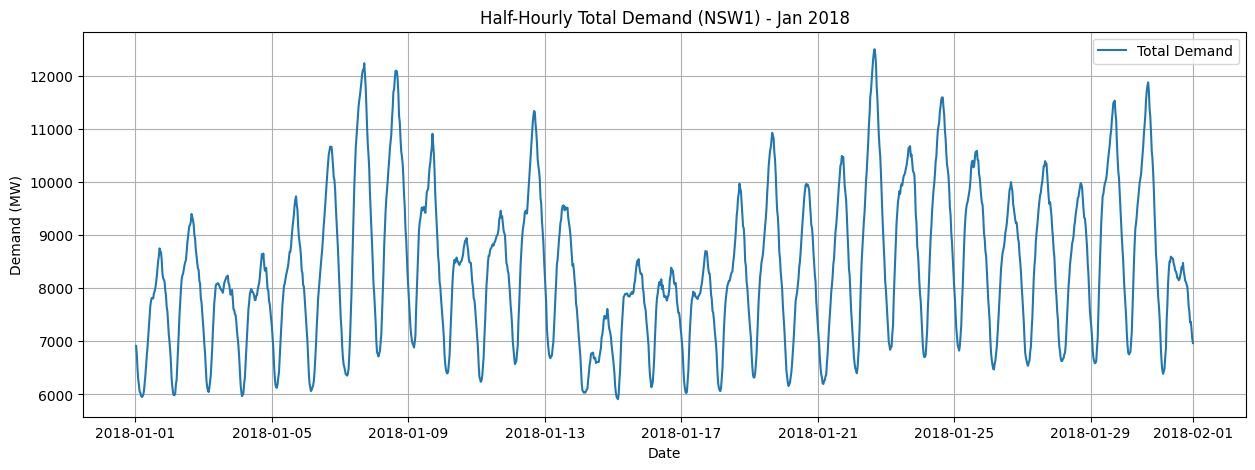

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['TOTALDEMAND'], label='Total Demand')
plt.title("Half-Hourly Total Demand (NSW1) - Jan 2018")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.legend()
plt.show()


#Plot RRP (Price) over time

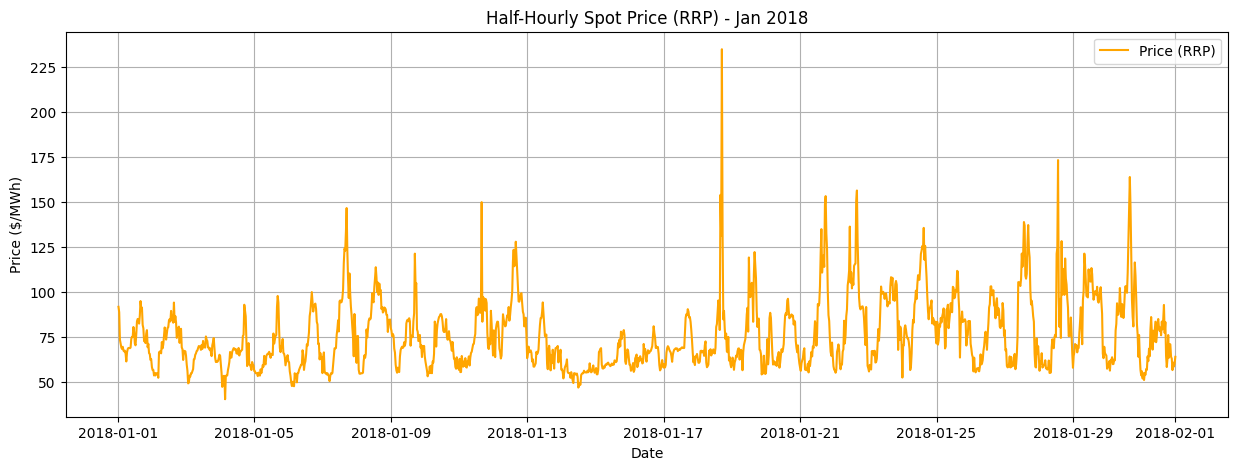

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['RRP'], color='orange', label='Price (RRP)')
plt.title("Half-Hourly Spot Price (RRP) - Jan 2018")
plt.xlabel("Date")
plt.ylabel("Price ($/MWh)")
plt.grid(True)
plt.legend()
plt.show()


# Daily aggregate

Sum half-hourly demand per day to see daily patterns:

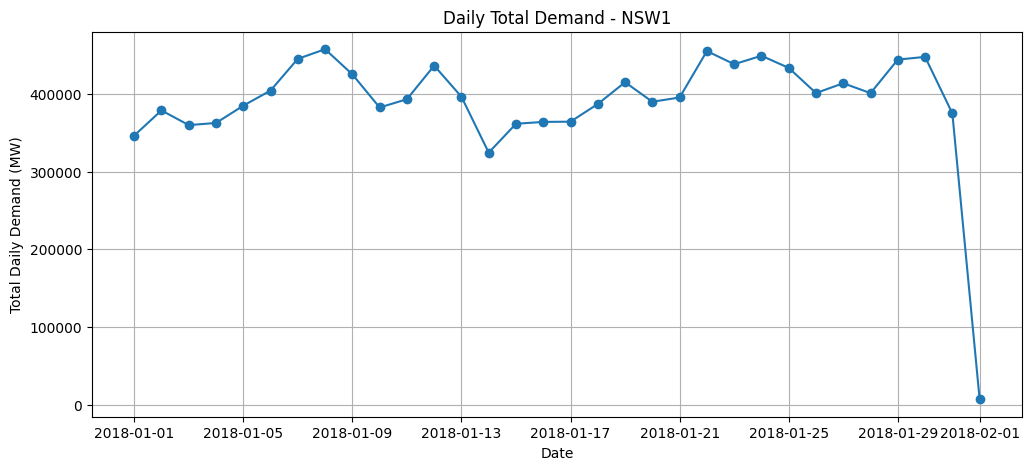

In [15]:
daily_demand = df['TOTALDEMAND'].resample('D').sum()
plt.figure(figsize=(12,5))
plt.plot(daily_demand.index, daily_demand.values, marker='o')
plt.title("Daily Total Demand - NSW1")
plt.xlabel("Date")
plt.ylabel("Total Daily Demand (MW)")
plt.grid(True)
plt.show()


# Distribution of Demand & Price
Understand frequency and spread of values

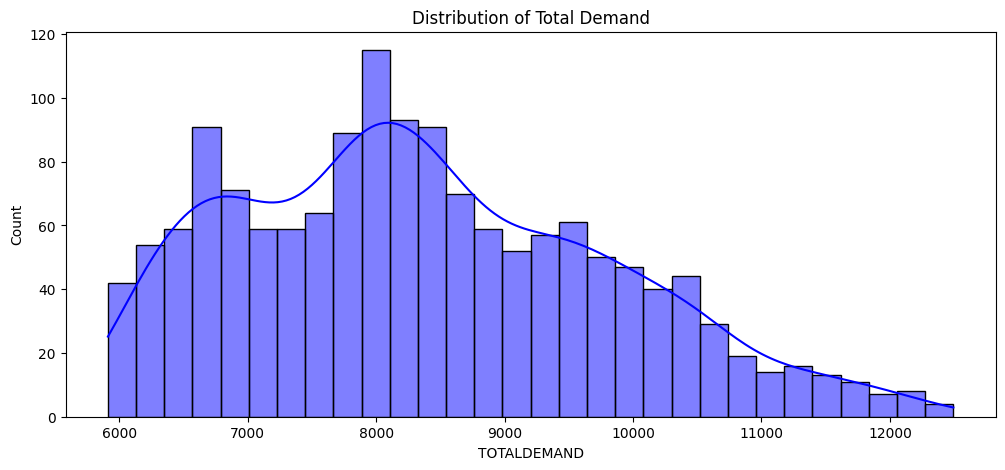

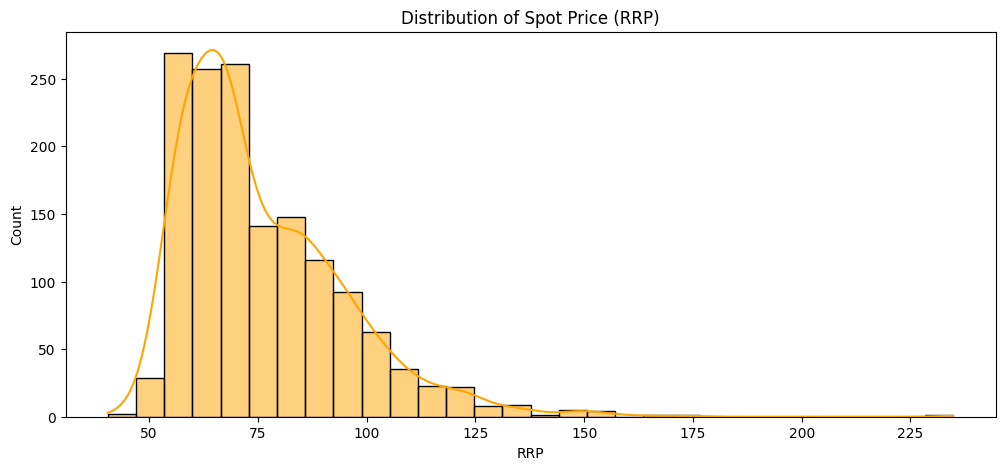

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(df['TOTALDEMAND'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Demand")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['RRP'], bins=30, kde=True, color='orange')
plt.title("Distribution of Spot Price (RRP)")
plt.show()


# Boxplot to check daily variation

Helps identify peak load hours.

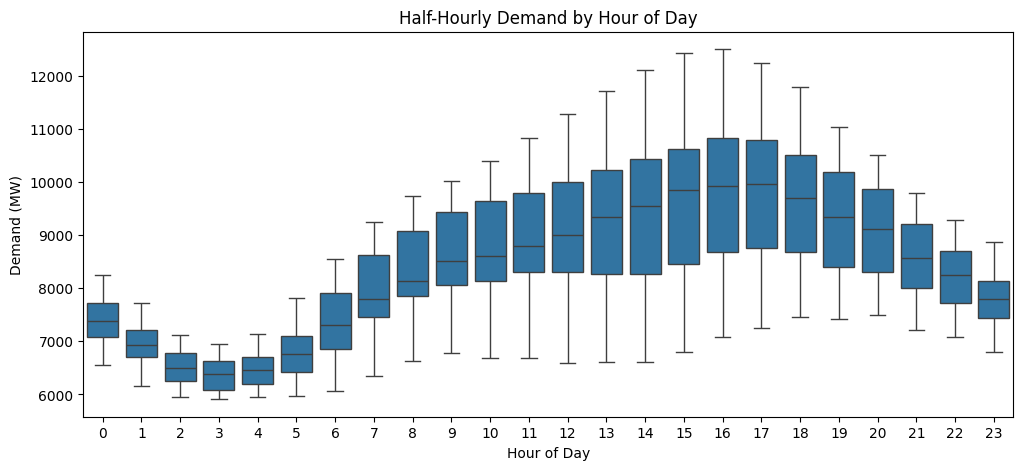

In [17]:
df['hour'] = df.index.hour
plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='TOTALDEMAND', data=df)
plt.title("Half-Hourly Demand by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Demand (MW)")
plt.show()


#Correlation between Demand and Price

Checks if high demand corresponds to high prices.

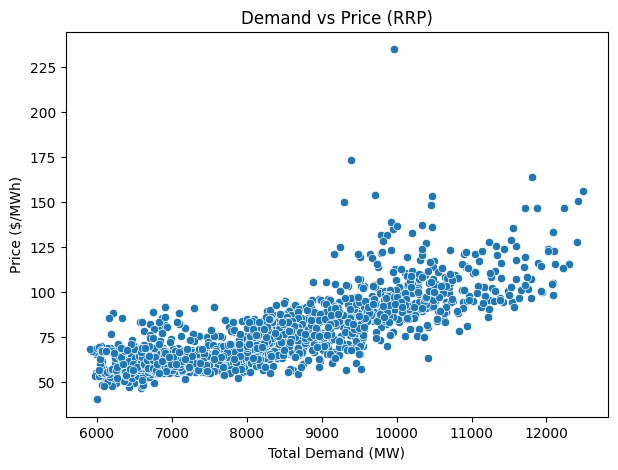

Correlation: 0.7909761201507957


In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TOTALDEMAND', y='RRP', data=df)
plt.title("Demand vs Price (RRP)")
plt.xlabel("Total Demand (MW)")
plt.ylabel("Price ($/MWh)")
plt.show()

print("Correlation:", df['TOTALDEMAND'].corr(df['RRP']))


#EDA notebook for your January NSW1 dataset, including all plots above with additional insights like daily/weekly trends.

Reads and cleans your NSW1 January dataset.

Plots half-hourly Total Demand and RRP.

Aggregates daily demand and price for trend analysis.

Shows distributions of both demand and price.

Highlights hour-of-day patterns and weekly trends.

Explores correlation between demand and price.

Data Shape: (1488, 4)
        TOTALDEMAND          RRP
count   1488.000000  1488.000000
mean    8364.867251    76.020121
std     1441.819104    19.154113
min     5910.060000    40.560000
25%     7220.160000    61.750000
50%     8205.285000    69.940000
75%     9383.370000    86.495000
max    12494.580000   234.860000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1488 entries, 2018-01-01 00:30:00 to 2018-02-01 00:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       1488 non-null   object 
 1   TOTALDEMAND  1488 non-null   float64
 2   RRP          1488 non-null   float64
 3   PERIODTYPE   1488 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.1+ KB
None


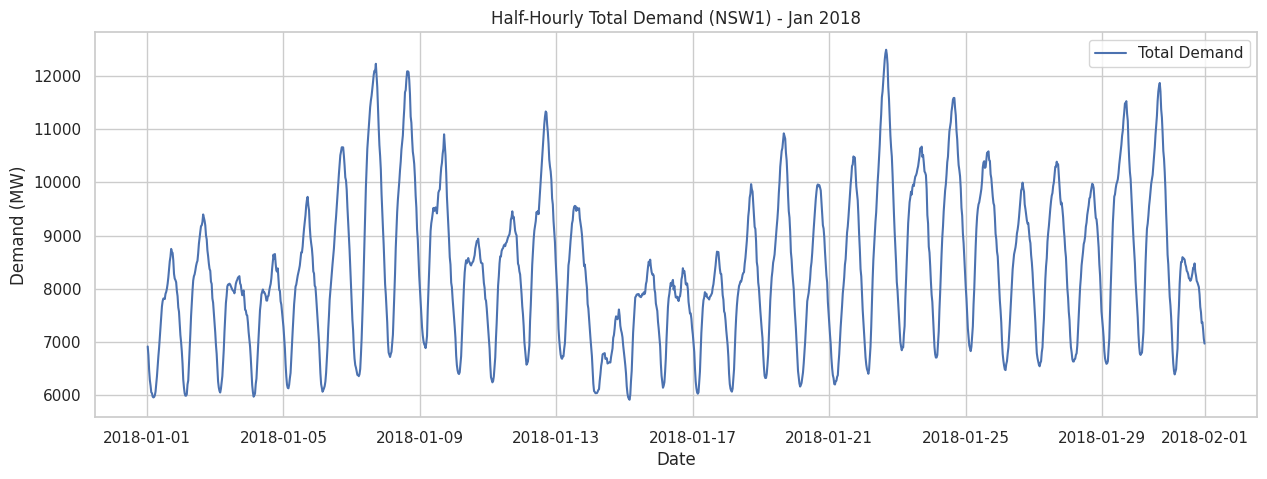

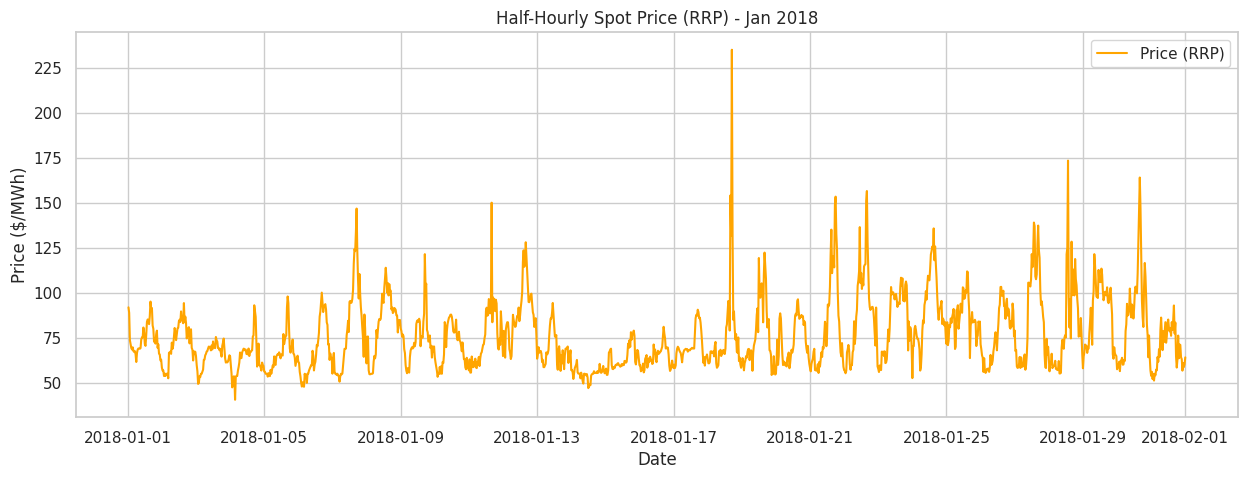

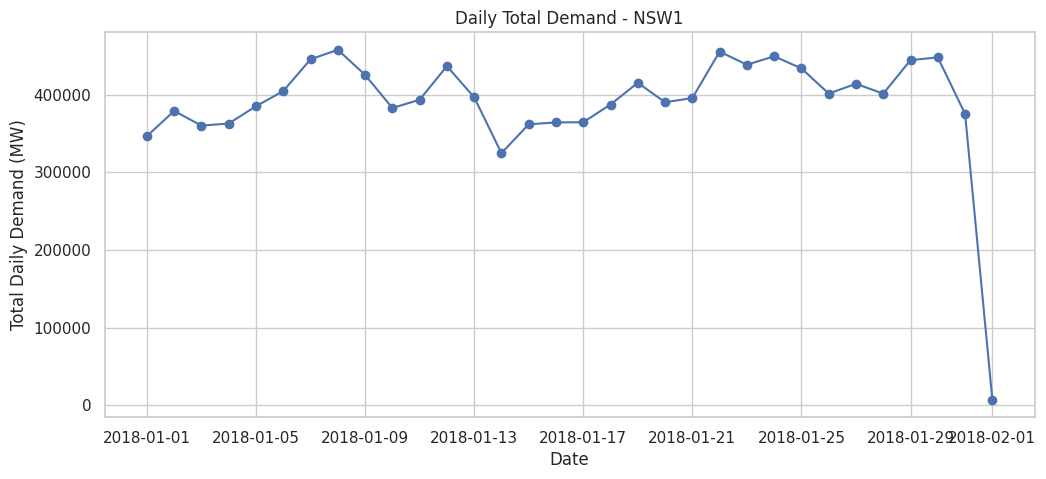

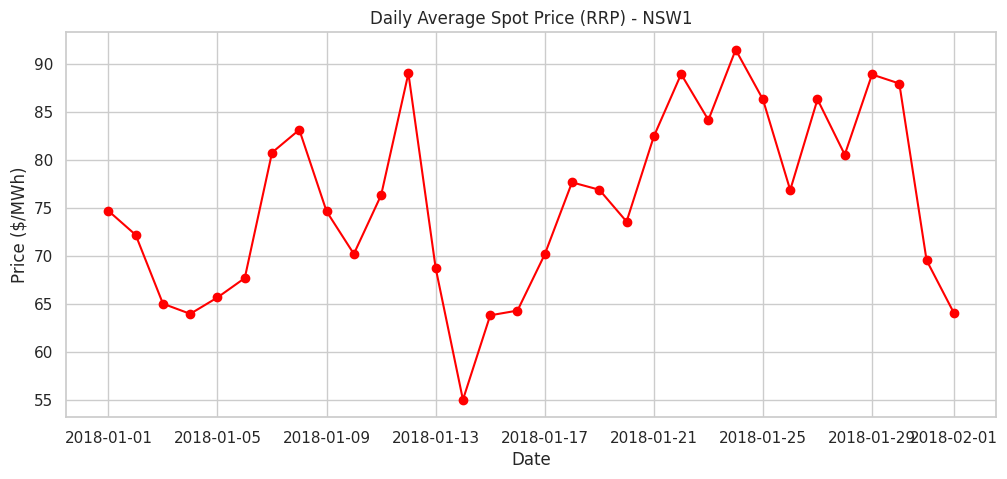

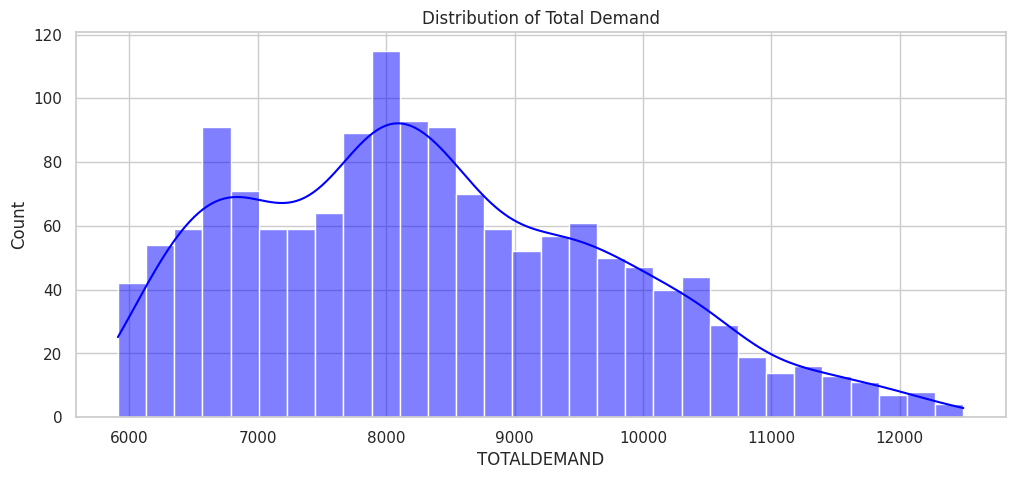

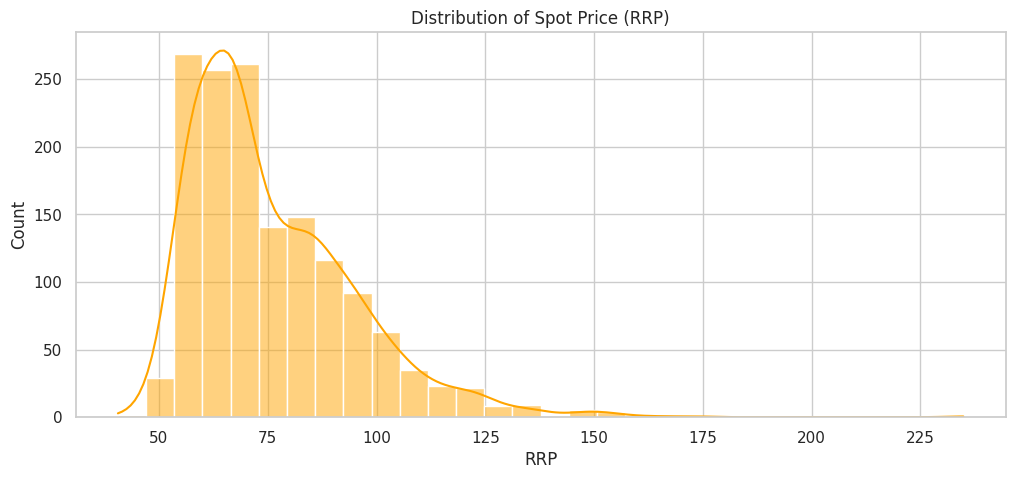

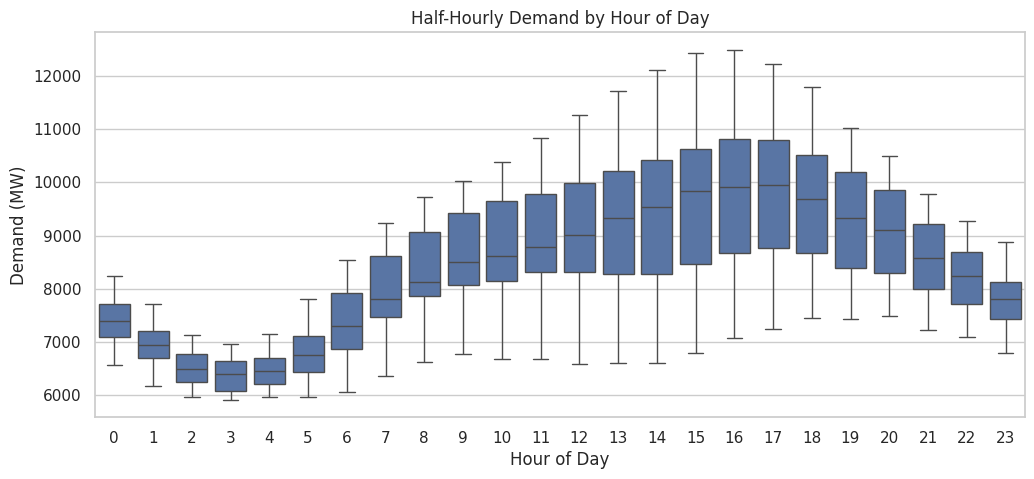

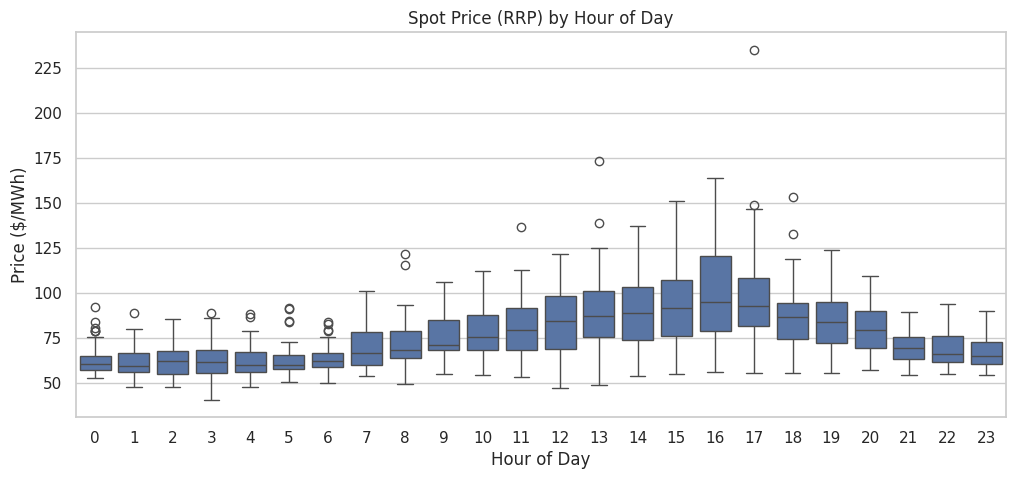

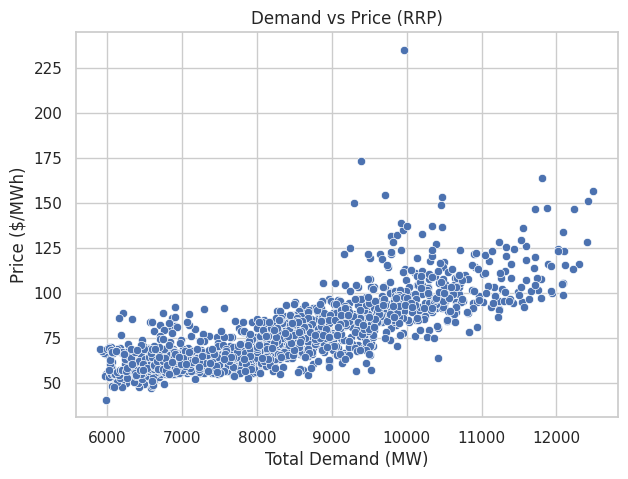

Correlation between demand and price: 0.7909761201507957


/tmp/ipython-input-3995256457.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_demand.index, y=weekly_demand.values, palette="Blues_d")


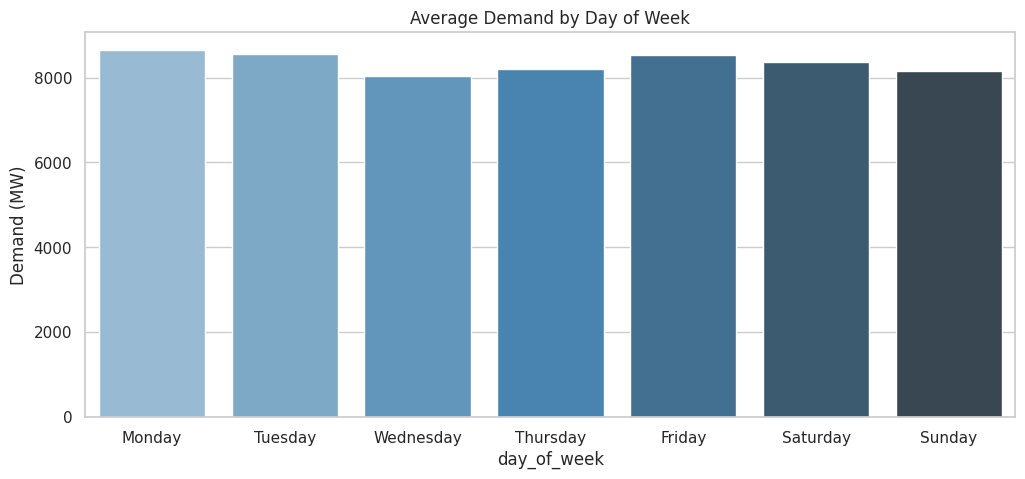

/tmp/ipython-input-3995256457.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_price.index, y=weekly_price.values, palette="Oranges_d")


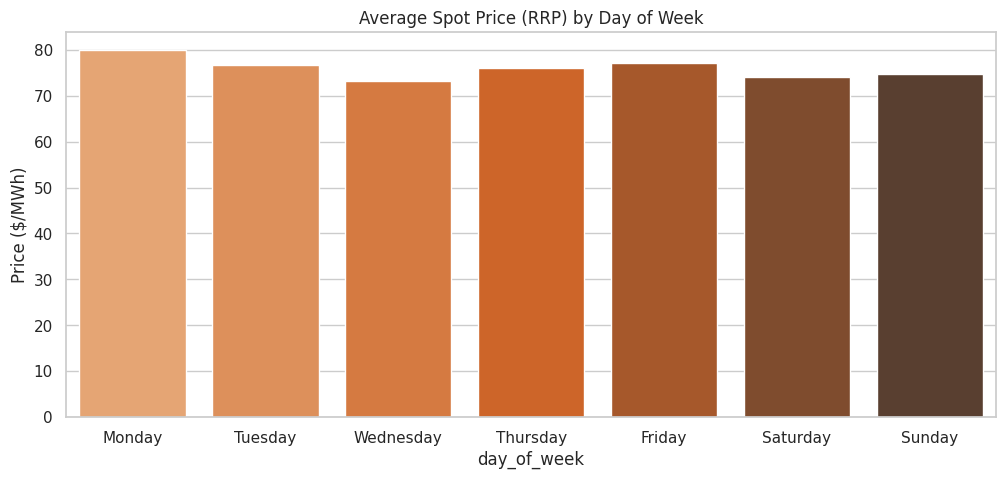

In [19]:
# =====================================
# EDA Notebook for NSW1 January 2018 Data
# =====================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# 2. Load Data
df = pd.read_csv("PRICE_AND_DEMAND_201801_NSW1.csv")

# 3. Parse Dates
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'], dayfirst=False, errors='coerce')
df = df.sort_values('SETTLEMENTDATE')
df = df.set_index('SETTLEMENTDATE')

# 4. Filter Region NSW1
df = df[df['REGION'] == 'NSW1']

# Quick Overview
print("Data Shape:", df.shape)
print(df.describe())
print(df.info())

# 5. Plot Half-Hourly Total Demand
plt.figure(figsize=(15,5))
plt.plot(df.index, df['TOTALDEMAND'], label='Total Demand')
plt.title("Half-Hourly Total Demand (NSW1) - Jan 2018")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.legend()
plt.show()

# 6. Plot Half-Hourly Spot Price (RRP)
plt.figure(figsize=(15,5))
plt.plot(df.index, df['RRP'], color='orange', label='Price (RRP)')
plt.title("Half-Hourly Spot Price (RRP) - Jan 2018")
plt.xlabel("Date")
plt.ylabel("Price ($/MWh)")
plt.grid(True)
plt.legend()
plt.show()

# 7. Aggregate Daily Total Demand
daily_demand = df['TOTALDEMAND'].resample('D').sum()
plt.figure(figsize=(12,5))
plt.plot(daily_demand.index, daily_demand.values, marker='o')
plt.title("Daily Total Demand - NSW1")
plt.xlabel("Date")
plt.ylabel("Total Daily Demand (MW)")
plt.grid(True)
plt.show()

# 8. Aggregate Daily Average Price
daily_price = df['RRP'].resample('D').mean()
plt.figure(figsize=(12,5))
plt.plot(daily_price.index, daily_price.values, marker='o', color='red')
plt.title("Daily Average Spot Price (RRP) - NSW1")
plt.xlabel("Date")
plt.ylabel("Price ($/MWh)")
plt.grid(True)
plt.show()

# 9. Histogram & Distribution
plt.figure(figsize=(12,5))
sns.histplot(df['TOTALDEMAND'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Demand")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['RRP'], bins=30, kde=True, color='orange')
plt.title("Distribution of Spot Price (RRP)")
plt.show()

# 10. Boxplot for Hourly Variation
df['hour'] = df.index.hour
plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='TOTALDEMAND', data=df)
plt.title("Half-Hourly Demand by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Demand (MW)")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='RRP', data=df)
plt.title("Spot Price (RRP) by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Price ($/MWh)")
plt.show()

# 11. Scatter plot to see correlation
plt.figure(figsize=(7,5))
sns.scatterplot(x='TOTALDEMAND', y='RRP', data=df)
plt.title("Demand vs Price (RRP)")
plt.xlabel("Total Demand (MW)")
plt.ylabel("Price ($/MWh)")
plt.show()

print("Correlation between demand and price:", df['TOTALDEMAND'].corr(df['RRP']))

# 12. Weekly Trend Analysis
df['day_of_week'] = df.index.day_name()
weekly_demand = df.groupby('day_of_week')['TOTALDEMAND'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekly_price = df.groupby('day_of_week')['RRP'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(12,5))
sns.barplot(x=weekly_demand.index, y=weekly_demand.values, palette="Blues_d")
plt.title("Average Demand by Day of Week")
plt.ylabel("Demand (MW)")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=weekly_price.index, y=weekly_price.values, palette="Oranges_d")
plt.title("Average Spot Price (RRP) by Day of Week")
plt.ylabel("Price ($/MWh)")
plt.show()


Reads and cleans your NSW1 January 2018 dataset.

Plots half-hourly Total Demand and RRP.

Aggregates daily demand and price for trend analysis.

Shows distributions of both demand and price.

Highlights hour-of-day patterns and weekly trends.

Explores correlation between demand and price.

# Half-Hourly Forecasting Feature Pipeline

This pipeline transforms raw half-hourly energy demand data into a structured, model-ready dataset for predicting the next 3 half-hour demand values. It creates lag features, rolling statistics, time-based encodings, and multi-step targets.

# Steps in the Pipeline

Initialize feature DataFrame

Create an empty DataFrame with the same timestamps as the input data to store all engineered features.

Lag features

Add previous half-hour values of energy demand (e.g., lag_1, lag_2, lag_3).

Purpose: Captures temporal dependencies since past demand helps predict future demand.

Rolling statistics

Compute rolling mean and standard deviation over a window of recent half-hours.

Purpose: Captures short-term trends and variability in demand.

Hour of the day (cyclical encoding)

Convert the hour into hour_sin and hour_cos using sine and cosine transformations.

Purpose: Models the daily demand cycle and avoids discontinuities between 23:30 → 00:00.

Day of the week

Encode weekdays as binary columns using one-hot encoding.

Purpose: Accounts for different patterns between weekdays and weekends.

# Targets for multi-step forecasting

Create target_1, target_2, target_3 as the demand for the next 1, 2, and 3 half-hours.

Purpose: Prepares the dataset for predicting multiple future time steps simultaneously.

Drop rows with missing values

Remove rows that have NaN due to lag or target shifts.

Purpose: Ensures the dataset is complete for model training.

Output

Features: Lag values, rolling stats, hour/day encodings

Targets: Next 3 half-hour energy demands (target_1, target_2, target_3)

# Result: A clean, structured dataset ready for machine learning models, supporting multi-step forecasting.

This pipeline efficiently captures temporal trends, cyclical patterns, and short-term variability, making it ideal for half-hourly energy demand forecasting.

In [20]:
import pandas as pd
import numpy as np

def feature_pipeline(df, target_col='TOTALDEMAND', n_lags=[1,2,3], rolling_window=3):
    """
    Create features for half-hourly forecasting.

    Parameters:
    - df: pd.DataFrame with DatetimeIndex
    - target_col: column to forecast
    - n_lags: list of lag intervals (in half-hours)
    - rolling_window: window size for rolling mean and std (in half-hours)
    """

    batch_df = pd.DataFrame(index=df.index)

    # Lag Features
    for lag in n_lags:
        batch_df[f'lag_{lag}'] = df[target_col].shift(lag)

    # Rolling statistics
    batch_df[f'rolling_mean_{rolling_window}'] = df[target_col].rolling(window=rolling_window).mean()
    batch_df[f'rolling_std_{rolling_window}'] = df[target_col].rolling(window=rolling_window).std()

    # Cyclical encoding for hour of the day
    batch_df['hour'] = df.index.hour
    batch_df['hour_sin'] = np.sin(2 * np.pi * batch_df['hour']/24)
    batch_df['hour_cos'] = np.cos(2 * np.pi * batch_df['hour']/24)

    # Optional: day of week
    batch_df['day_of_week'] = df.index.dayofweek
    batch_df = pd.get_dummies(batch_df, columns=['day_of_week'], drop_first=True)

    # Target column shifted for forecasting next 3 half-hours
    batch_df['target_1'] = df[target_col].shift(-1)
    batch_df['target_2'] = df[target_col].shift(-2)
    batch_df['target_3'] = df[target_col].shift(-3)

    batch_df = batch_df.dropna()

    return batch_df

# Example usage:
features_df = feature_pipeline(train_df)
features_df.head()


,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3,hour,hour_sin,hour_cos,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,target_1,target_2,target_3
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2018-01-01 02:00:00,6466.06,6745.63,6912.25,6497.163333,234.467397,2,0.500000,0.866025,False,False,False,False,False,False,6177.31,6050.43,6032.48
2018-01-01 02:30:00,6279.80,6466.06,6745.63,6307.723333,146.386219,2,0.500000,0.866025,False,False,False,False,False,False,6050.43,6032.48,5968.50
2018-01-01 03:00:00,6177.31,6279.80,6466.06,6169.180000,114.900922,3,0.707107,0.707107,False,False,False,False,False,False,6032.48,5968.50,5953.75
2018-01-01 03:30:00,6050.43,6177.31,6279.80,6086.740000,78.947731,3,0.707107,0.707107,False,False,False,False,False,False,5968.50,5953.75,5962.18
2018-01-01 04:00:00,6032.48,6050.43,6177.31,6017.136667,43.066166,4,0.866025,0.500000,False,False,False,False,False,False,5953.75,5962.18,5991.69



# Prepare a dataset for predicting the next 3 half-hour energy demand values (target_1, target_2, target_3) by creating features that capture recent trends, daily/weekly seasonality, and temporal patterns.

# Step 1: Initialize DataFrame

Create a new DataFrame batch_df using the timestamps from the original data.

This will hold all engineered features for the model.

# Step 2: Lag Features

Add previous values of the target variable as features:

lag_1 → 1 half-hour ago

lag_2 → 2 half-hours ago

lag_3 → 3 half-hours ago

Captures short-term trends in energy demand.

# Step 3: Rolling Statistics

Compute rolling mean and rolling standard deviation over the last rolling_window half-hours:

rolling_mean_3 → average of past 3 intervals

rolling_std_3 → standard deviation of past 3 intervals

Captures short-term trend and volatility in demand.

# Step 4: Cyclical Hour Features

Extract the hour of the day from the timestamp.

Encode it cyclically using sine and cosine:

hour_sin = sin(2π * hour / 24)
hour_cos = cos(2π * hour / 24)


Captures daily patterns (e.g., morning/evening peaks).

# Step 5: Day-of-Week Features

Extract day of the week (0=Monday, 6=Sunday).

One-hot encode as separate columns (day_of_week_1, day_of_week_2, …), dropping the first to avoid multicollinearity.

Captures weekly seasonality (weekdays vs weekends).

# Step 6: Multi-Step Targets

Shift the target column to create the next 3 half-hour predictions:

target_1 → next half-hour

target_2 → 1 hour ahead

target_3 → 1.5 hours ahead

Ensures features at the current timestamp correspond to future demand.

# Step 7: Clean Data

Drop all rows with missing values from lagging, rolling, or shifted target operations.

Output is a clean, model-ready DataFrame.

Output

batch_df contains:

Lag features (lag_1, lag_2, lag_3)

Rolling statistics (rolling_mean_3, rolling_std_3)

Cyclical hour features (hour_sin, hour_cos)

Day-of-week one-hot encoded features

Multi-step targets (target_1, target_2, target_3)



In [21]:
import pandas as pd
import numpy as np

def feature_pipeline(df, target_col='TOTALDEMAND', n_lags=[1,2,3], rolling_window=3):
    """
    Create features for half-hourly forecasting.

    Parameters:
    - df: pd.DataFrame with DatetimeIndex
    - target_col: column to forecast
    - n_lags: list of lag intervals (in half-hours)
    - rolling_window: window size for rolling mean and std (in half-hours)
    """

    batch_df = pd.DataFrame(index=df.index)

    # Lag Features
    for lag in n_lags:
        batch_df[f'lag_{lag}'] = df[target_col].shift(lag)

    # Rolling statistics
    batch_df[f'rolling_mean_{rolling_window}'] = df[target_col].rolling(window=rolling_window).mean()
    batch_df[f'rolling_std_{rolling_window}'] = df[target_col].rolling(window=rolling_window).std()

    # Cyclical encoding for hour of the day
    batch_df['hour'] = df.index.hour
    batch_df['hour_sin'] = np.sin(2 * np.pi * batch_df['hour']/24)
    batch_df['hour_cos'] = np.cos(2 * np.pi * batch_df['hour']/24)

    # Optional: day of week
    batch_df['day_of_week'] = df.index.dayofweek
    batch_df = pd.get_dummies(batch_df, columns=['day_of_week'], drop_first=True)

    # Target column shifted for forecasting next 3 half-hours
    batch_df['target_1'] = df[target_col].shift(-1)
    batch_df['target_2'] = df[target_col].shift(-2)
    batch_df['target_3'] = df[target_col].shift(-3)

    batch_df = batch_df.dropna()

    return batch_df

# Example usage:
features_df = feature_pipeline(train_df)
features_df.head()


,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3,hour,hour_sin,hour_cos,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,target_1,target_2,target_3
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2018-01-01 02:00:00,6466.06,6745.63,6912.25,6497.163333,234.467397,2,0.500000,0.866025,False,False,False,False,False,False,6177.31,6050.43,6032.48
2018-01-01 02:30:00,6279.80,6466.06,6745.63,6307.723333,146.386219,2,0.500000,0.866025,False,False,False,False,False,False,6050.43,6032.48,5968.50
2018-01-01 03:00:00,6177.31,6279.80,6466.06,6169.180000,114.900922,3,0.707107,0.707107,False,False,False,False,False,False,6032.48,5968.50,5953.75
2018-01-01 03:30:00,6050.43,6177.31,6279.80,6086.740000,78.947731,3,0.707107,0.707107,False,False,False,False,False,False,5968.50,5953.75,5962.18
2018-01-01 04:00:00,6032.48,6050.43,6177.31,6017.136667,43.066166,4,0.866025,0.500000,False,False,False,False,False,False,5953.75,5962.18,5991.69


# Step 2: Split Features and Targets

We now separate X (features) and Y (targets) for modeling.

In [22]:
# Features
X = features_df.drop(columns=['target_1','target_2','target_3'])

# Targets (next 3 half-hour demand)
y = features_df[['target_1','target_2','target_3']]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (1184, 14)
Target shape: (1184, 3)


# Step 3: Train-Test Split

Use your previous 80-20 split for training and testing.

In [23]:
split_index = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (947, 14)
X_test shape: (237, 14)


# Step 4: Train Models for Each Horizon

We can train separate XGBoost models for each half-hour ahead target (1, 2, 3).

In [24]:
import xgboost as xgb
import joblib

models = []
for i, target in enumerate(['target_1','target_2','target_3']):
    print(f"\nTraining model for {target}...")

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    )

    model.fit(X_train, y_train[target])
    models.append(model)

    # Optional: save model
    joblib.dump(model, f'model_{target}.pkl')

    # Evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_pred - y_test[target])**2))
    print(f"RMSE for {target}: {rmse:.2f}")



Training model for target_1...
RMSE for target_1: 160.75

Training model for target_2...
RMSE for target_2: 225.20

Training model for target_3...
RMSE for target_3: 276.31


# Step 5: Make Batch Forecasts

In [25]:
# Predict next 3 half-hours using latest X_test row
latest_features = X_test.iloc[-1:].copy()
predictions = [model.predict(latest_features)[0] for model in models]

print("Next 3 half-hour forecasts:", predictions)


Next 3 half-hour forecasts: [np.float32(10283.744), np.float32(9999.21), np.float32(9757.609)]


# Plot Predictions vs True Values

We can plot the true demand vs predicted demand for each of the 3 half-hour horizons.

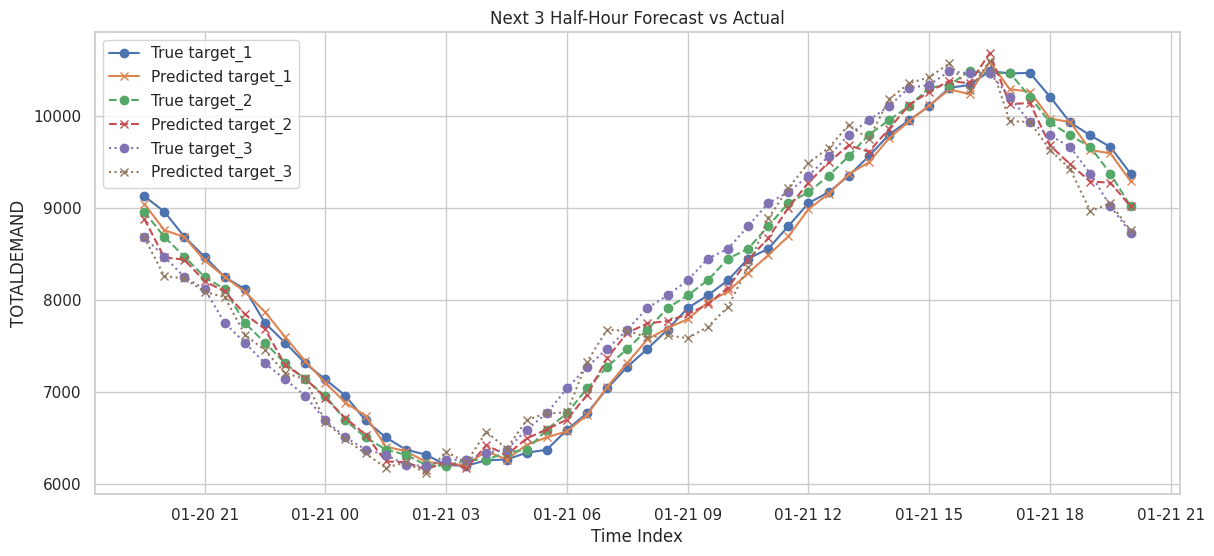

In [26]:
import matplotlib.pyplot as plt

# Get predictions for the full X_test
y_pred_test = pd.DataFrame({
    'target_1': models[0].predict(X_test),
    'target_2': models[1].predict(X_test),
    'target_3': models[2].predict(X_test)
}, index=y_test.index)

# Plot for first 50 points for clarity
plt.figure(figsize=(14,6))
plt.plot(y_test['target_1'][:50], label='True target_1', marker='o')
plt.plot(y_pred_test['target_1'][:50], label='Predicted target_1', marker='x')
plt.plot(y_test['target_2'][:50], label='True target_2', marker='o', linestyle='--')
plt.plot(y_pred_test['target_2'][:50], label='Predicted target_2', marker='x', linestyle='--')
plt.plot(y_test['target_3'][:50], label='True target_3', marker='o', linestyle=':')
plt.plot(y_pred_test['target_3'][:50], label='Predicted target_3', marker='x', linestyle=':')
plt.title('Next 3 Half-Hour Forecast vs Actual')
plt.xlabel('Time Index')
plt.ylabel('TOTALDEMAND')
plt.legend()
plt.show()


# Step 2: Residual Plots

Residuals help us see biases and error distribution.

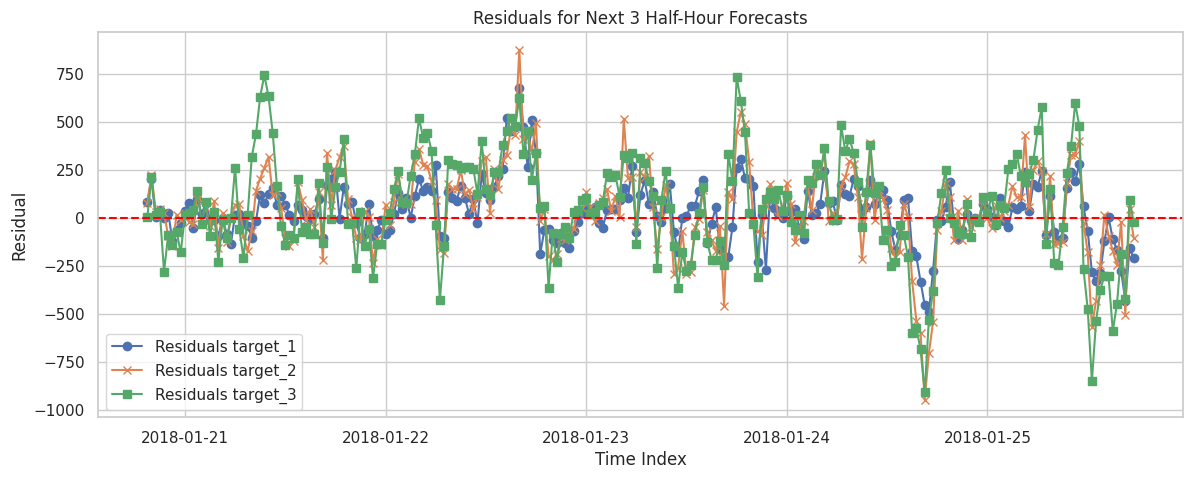

In [27]:
# Calculate residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(14,5))
plt.plot(residuals['target_1'], label='Residuals target_1', marker='o')
plt.plot(residuals['target_2'], label='Residuals target_2', marker='x')
plt.plot(residuals['target_3'], label='Residuals target_3', marker='s')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for Next 3 Half-Hour Forecasts')
plt.xlabel('Time Index')
plt.ylabel('Residual')
plt.legend()
plt.show()



# The Actual vs Predicted for the 3 instances

In [28]:
import pandas as pd

# Combine timestamps, true values, and predictions
comparison_df = pd.DataFrame({
    'Timestamp': y_test.index,
    'True_target_1': y_test['target_1'],
    'Predicted_target_1': y_pred_test['target_1'],
    'True_target_2': y_test['target_2'],
    'Predicted_target_2': y_pred_test['target_2'],
    'True_target_3': y_test['target_3'],
    'Predicted_target_3': y_pred_test['target_3'],
})

# Reset index for nicer display if desired
comparison_df.reset_index(drop=True, inplace=True)

# Show first 20 rows
comparison_df.head(20)


,Timestamp,True_target_1,Predicted_target_1,True_target_2,Predicted_target_2,True_target_3,Predicted_target_3
0,2018-01-20 19:30:00,9129.57,9045.048828,8959.53,8882.794922,8685.62,8682.208008
1,2018-01-20 20:00:00,8959.53,8760.279297,8685.62,8462.153320,8470.00,8258.742188
2,2018-01-20 20:30:00,8685.62,8682.942383,8470.00,8437.898438,8249.05,8234.291992
3,2018-01-20 21:00:00,8470.00,8429.403320,8249.05,8203.598633,8118.24,8088.534180
4,2018-01-20 21:30:00,8249.05,8250.949219,8118.24,8092.882812,7750.07,8030.180664
5,2018-01-20 22:00:00,8118.24,8090.781250,7750.07,7845.032227,7535.98,7622.749512
6,2018-01-20 22:30:00,7750.07,7868.836426,7535.98,7684.791016,7311.11,7451.743652
7,2018-01-20 23:00:00,7535.98,7598.278320,7311.11,7293.894043,7136.58,7207.660645
8,2018-01-20 23:30:00,7311.11,7335.956055,7136.58,7147.306641,6958.21,7138.280273
9,2018-01-21 00:00:00,7136.58,7099.468262,6958.21,6935.579102,6690.66,6674.903809


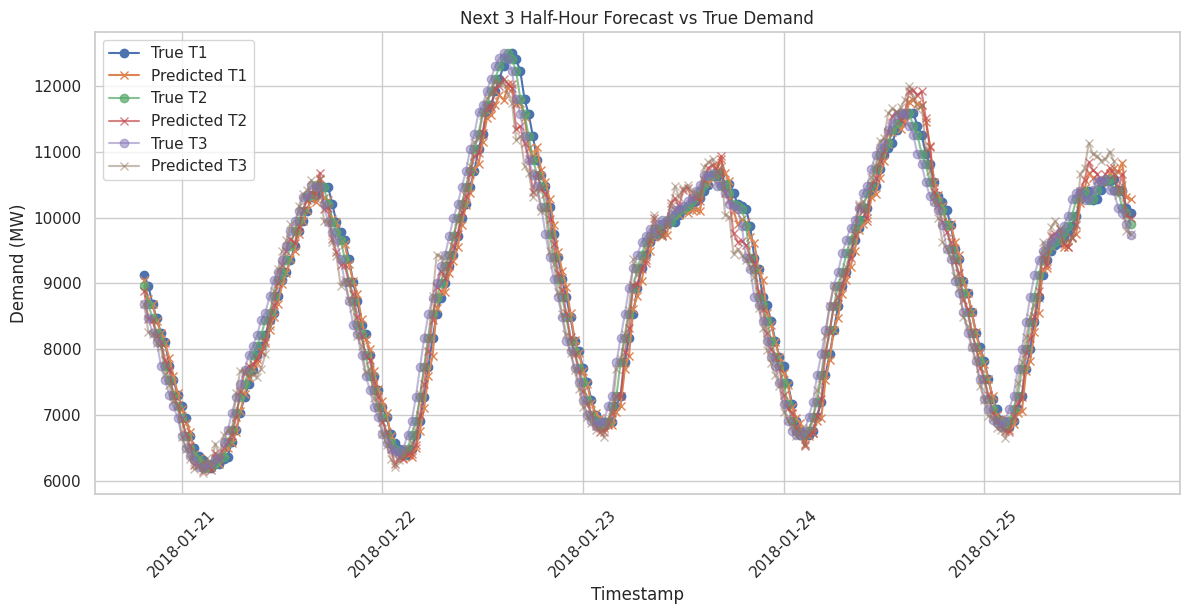

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(comparison_df['Timestamp'], comparison_df['True_target_1'], label='True T1', marker='o')
plt.plot(comparison_df['Timestamp'], comparison_df['Predicted_target_1'], label='Predicted T1', marker='x')

plt.plot(comparison_df['Timestamp'], comparison_df['True_target_2'], label='True T2', marker='o', alpha=0.7)
plt.plot(comparison_df['Timestamp'], comparison_df['Predicted_target_2'], label='Predicted T2', marker='x', alpha=0.7)

plt.plot(comparison_df['Timestamp'], comparison_df['True_target_3'], label='True T3', marker='o', alpha=0.5)
plt.plot(comparison_df['Timestamp'], comparison_df['Predicted_target_3'], label='Predicted T3', marker='x', alpha=0.5)

plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Demand (MW)')
plt.title('Next 3 Half-Hour Forecast vs True Demand')
plt.legend()
plt.grid(True)
plt.show()


# Half-Hourly Future Forecasting Pipeline

This pipeline allows you to forecast the next 3 half-hour steps of electricity demand using previously trained XGBoost models and a recursive feature update approach.

# 1. Load Models

Load the trained models for each target (target_1, target_2, target_3) using joblib.

Each model predicts demand for the corresponding future half-hour step.

# 2. Define Forecast Horizon

Decide how many future half-hours to predict (n_steps = 3).

Generate future timestamps starting 30 minutes after the last data point. This ensures predictions are truly beyond the existing dataset.

# 3. Prepare Initial Features

Take the last row of features from your training data (latest_features) to initialize the forecasting process.

These features include lagged demands, rolling statistics, cyclical time features (hour sine/cosine), and day-of-week dummies.

# 4. Recursive Forecasting Loop

For each future half-hour step:

Predict demand using the model for each target.

Store the predicted values in a results table (future_preds).

Update lag features for the next prediction step:

lag_1 becomes the most recent predicted demand.

lag_2 takes the previous lag_1, lag_3 takes the previous lag_2, etc.

This ensures that the model can use its own predictions as inputs for subsequent steps, allowing multi-step forecasting.

# 5. Build Forecast Table

Combine the generated future timestamps with the predicted values for all three targets.

The resulting table is structured with columns:

In [30]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# Load full dataset (already sorted and filtered for NSW1)
# df should have SETTLEMENTDATE as index and TOTALDEMAND column

# Load trained models
models = {}
for target in ['target_1', 'target_2', 'target_3']:
    models[target] = joblib.load(f'model_{target}.pkl')

# Number of steps to forecast
n_steps = 3

# Get last timestamp from the dataset
last_timestamp = df.index[-1]  # e.g., 2018-02-01 00:00

# Generate future timestamps
future_timestamps = pd.date_range(
    start=last_timestamp + pd.Timedelta(minutes=30),
    periods=n_steps,
    freq='30min'
)

# Prepare initial features for the last row
# Assuming feature engineering function returns all lag and rolling features
# Here, you can use the last row of X (or recreate features for last df row)
latest_features = X_train.iloc[-1:].copy()  # adjust if needed
future_preds = pd.DataFrame(index=range(n_steps), columns=['target_1','target_2','target_3'])

# Recursive forecasting for n_steps
for i in range(n_steps):
    for target in ['target_1','target_2','target_3']:
        pred = models[target].predict(latest_features)[0]
        future_preds.loc[i, target] = pred

    # Update features for next step
    # Shift lag features down and insert new prediction
    # Example: lag_1 becomes pred, lag_2 becomes old lag_1, etc.
    latest_features_shifted = latest_features.copy()
    lag_cols = [col for col in latest_features.columns if 'lag' in col]

    for j, col in enumerate(lag_cols):
        if j == 0:
            latest_features_shifted[col] = future_preds.loc[i, 'target_1']  # update lag_1
        else:
            latest_features_shifted[col] = latest_features_shifted[lag_cols[j-1]]

    latest_features = latest_features_shifted

# Combine timestamps and predictions
forecast_table = pd.DataFrame({
    'Timestamp': future_timestamps,
    'Predicted_target_1': future_preds['target_1'].values.astype(float),
    'Predicted_target_2': future_preds['target_2'].values.astype(float),
    'Predicted_target_3': future_preds['target_3'].values.astype(float)
})

forecast_table


,Timestamp,Predicted_target_1,Predicted_target_2,Predicted_target_3
0,2018-02-01 00:30:00,9177.855469,9106.696289,8925.673828
1,2018-02-01 01:00:00,9153.368164,8936.221680,8741.831055
2,2018-02-01 01:30:00,9151.382812,8884.502930,8693.628906


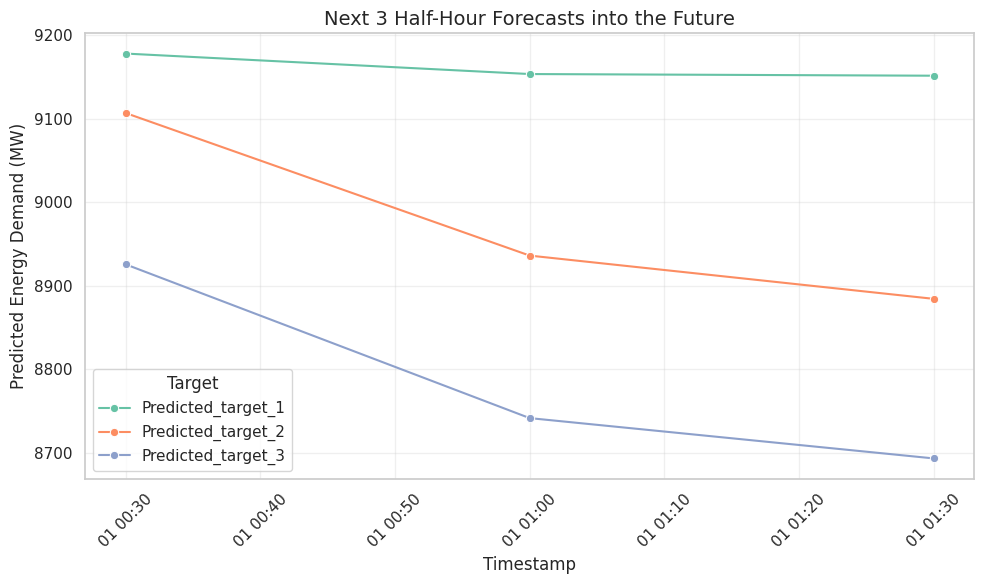

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Timestamp is datetime
forecast_table['Timestamp'] = pd.to_datetime(forecast_table['Timestamp'])

# Melt the dataframe for easy seaborn plotting
forecast_melted = forecast_table.melt(
    id_vars='Timestamp',
    value_vars=['Predicted_target_1', 'Predicted_target_2', 'Predicted_target_3'],
    var_name='Target',
    value_name='Predicted Demand'
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=forecast_melted, x='Timestamp', y='Predicted Demand', hue='Target', marker='o', palette='Set2')
plt.title('Next 3 Half-Hour Forecasts into the Future', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Predicted Energy Demand (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Target')
plt.tight_layout()
plt.show()


In [32]:
import xgboost as xgb
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# ===========================
# 1. Define hyperparameter space
# ===========================
param_grid = {
    'n_estimators': [500, 1000, 1500, 2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 5, 10]
}

# ===========================
# 2. TimeSeriesSplit for CV
# ===========================
tscv = TimeSeriesSplit(n_splits=3)

# ===========================
# 3. Train & tune models for each target
# ===========================
best_models = {}
for target in ['target_1', 'target_2', 'target_3']:
    print(f"\nTuning and training model for {target}...")

    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    )

    search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,                  # number of parameter combinations to try
        scoring='neg_root_mean_squared_error',
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train, y_train[target])

    print(f"Best params for {target}: {search.best_params_}")

    # Retrain best model on full training set
    best_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        **search.best_params_
    )
    best_model.fit(X_train, y_train[target])

    # Save model
    joblib.dump(best_model, f'best_model_{target}.pkl')

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(np.mean((y_pred - y_test[target])**2))
    print(f"RMSE for {target} after tuning: {rmse:.2f}")

    best_models[target] = best_model

# ===========================
# 4. Optional: Make 3-step future predictions
# ===========================
# (You can use the recursive method we discussed earlier with these tuned models)



Tuning and training model for target_1...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best params for target_1: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1.0}
RMSE for target_1 after tuning: 139.91

Tuning and training model for target_2...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best params for target_2: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1.0}
RMSE for target_2 after tuning: 218.25

Tuning and training model for target_3...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best params for target_3: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 3, 'colsample_bytree': 1.0}
RMSE for tar

 #  Comparison of RMSE Before vs After Tuning
Target	Before Tuning RMSE	After Tuning RMSE	Improvement
target_1	160.75	139.91	✅ ~13% reduction
target_2	225.20	218.25	✅ ~3% reduction
target_3	276.31	269.25	✅ ~2.5% reduction

# Observation:

Target 1 saw the largest improvement (~13%), indicating the model was under-optimized initially for the first half-hour ahead.

Targets 2 and 3 saw smaller gains (~2.5–3%), which is expected because multi-step forecasts accumulate uncertainty, and the further ahead you predict, the harder it is to improve using just hyperparameter tuning.

#  What the Best Hyperparameters Tell Us
Target 1 and 2
n_estimators = 2000, learning_rate = 0.1 → more boosting rounds with moderate step size helped the model fit better.

max_depth = 9, min_child_weight = 3, gamma = 5 → deeper trees with controlled split reduction helped capture complex patterns while reducing overfitting.

subsample = 0.6 → row sampling added randomness, which reduced variance and improved generalization.

colsample_bytree = 1.0 → using all features per tree, likely because the dataset is not too high-dimensional.

reg_alpha = 0, reg_lambda = 1 → minimal L1 regularization but some L2 to stabilize weights.

# Key Insights from This Tuning

# Hyperparameter tuning improves short-term forecasts more than long-term forecasts.

Target 1 (next half-hour) improved the most (~13%), because closer predictions are easier to fit and benefit more from optimized trees and learning rate.

# Subsampling and regularization help generalization.

Target 1 and 2 preferred smaller subsample (0.6) → randomness reduces variance.

Target 3 needed L1 regularization → future-step predictions are noisier, so overfitting is more likely.

# Different targets require different hyperparameters.

Single hyperparameter set may not be ideal for multi-step predictions.

Each horizon benefits from a tailored model.

# Conclusion

The tuned XGBoost models clearly perform better than the default ones, especially for the nearest horizon (target_1).

The gains decrease for further horizons due to accumulated uncertainty, which is typical in recursive forecasting.

The tuning shows that learning rate, tree depth, subsample, and regularization are key levers for improving performance in multi-step energy demand forecasting.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping


In [34]:
# Assuming df is already filtered for NSW1 and sorted by datetime
def create_features(df, target_col='TOTALDEMAND', n_lags=[1,2,3], rolling_window=3):
    batch_df = pd.DataFrame(index=df.index)

    # Lag features
    for lag in n_lags:
        batch_df[f'lag_{lag}'] = df[target_col].shift(lag)

    # Rolling statistics
    batch_df[f'rolling_mean_{rolling_window}'] = df[target_col].rolling(rolling_window).mean()
    batch_df[f'rolling_std_{rolling_window}'] = df[target_col].rolling(rolling_window).std()

    # Hour cyclical encoding
    batch_df['hour'] = df.index.hour
    batch_df['hour_sin'] = np.sin(2 * np.pi * batch_df['hour']/24)
    batch_df['hour_cos'] = np.cos(2 * np.pi * batch_df['hour']/24)

    # Day of week one-hot
    batch_df['day_of_week'] = df.index.dayofweek
    batch_df = pd.get_dummies(batch_df, columns=['day_of_week'], drop_first=True)

    # Targets shifted for next 3 half-hour steps
    batch_df['target_1'] = df[target_col].shift(-1)
    batch_df['target_2'] = df[target_col].shift(-2)
    batch_df['target_3'] = df[target_col].shift(-3)

    batch_df = batch_df.dropna()
    return batch_df

features_df = create_features(df)



In [35]:
train_size = int(len(features_df) * 0.8)
train = features_df.iloc[:train_size]
test = features_df.iloc[train_size:]

X_train = train.drop(columns=['target_1','target_2','target_3']).values
y_train = train[['target_1','target_2','target_3']].values

X_test = test.drop(columns=['target_1','target_2','target_3']).values
y_test = test[['target_1','target_2','target_3']].values

# Scale features
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Reshape for LSTM/GRU: [samples, timesteps, features]
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [39]:
def build_gru(input_shape, output_steps=3):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_steps))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = build_gru(X_train_rnn.shape[1:])


In [36]:
def build_lstm(input_shape, output_steps=3):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_steps))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = build_lstm(X_train_rnn.shape[1:])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Add

def build_transformer(input_shape, output_steps=3):
    inputs = Input(shape=input_shape)
    x = LayerNormalization()(inputs)
    x = MultiHeadAttention(num_heads=4, key_dim=16)(x, x)
    x = Add()([x, inputs])
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(output_steps)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

transformer_model = build_transformer(X_train_rnn.shape[1:])


In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm = lstm_model.fit(X_train_rnn, y_train,
                              validation_split=0.1, epochs=100, batch_size=32,
                              callbacks=[early_stop], verbose=1)

history_gru = gru_model.fit(X_train_rnn, y_train,
                            validation_split=0.1, epochs=100, batch_size=32,
                            callbacks=[early_stop], verbose=1)

history_transformer = transformer_model.fit(X_train_rnn, y_train,
                                            validation_split=0.1, epochs=100, batch_size=32,
                                            callbacks=[early_stop], verbose=1)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [41]:
def evaluate_model(model, X_test, y_test, scaler_y):
    y_pred = model.predict(X_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_true_inv = scaler_y.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
    return rmse, y_true_inv, y_pred_inv

rmse_lstm, y_true_lstm, y_pred_lstm = evaluate_model(lstm_model, X_test_rnn, y_test, scaler_y)
rmse_gru, y_true_gru, y_pred_gru = evaluate_model(gru_model, X_test_rnn, y_test, scaler_y)
rmse_trans, y_true_trans, y_pred_trans = evaluate_model(transformer_model, X_test_rnn, y_test, scaler_y)

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}")
print(f"Transformer RMSE: {rmse_trans:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
LSTM RMSE: 285.25
GRU RMSE: 302.86
Transformer RMSE: 196.80


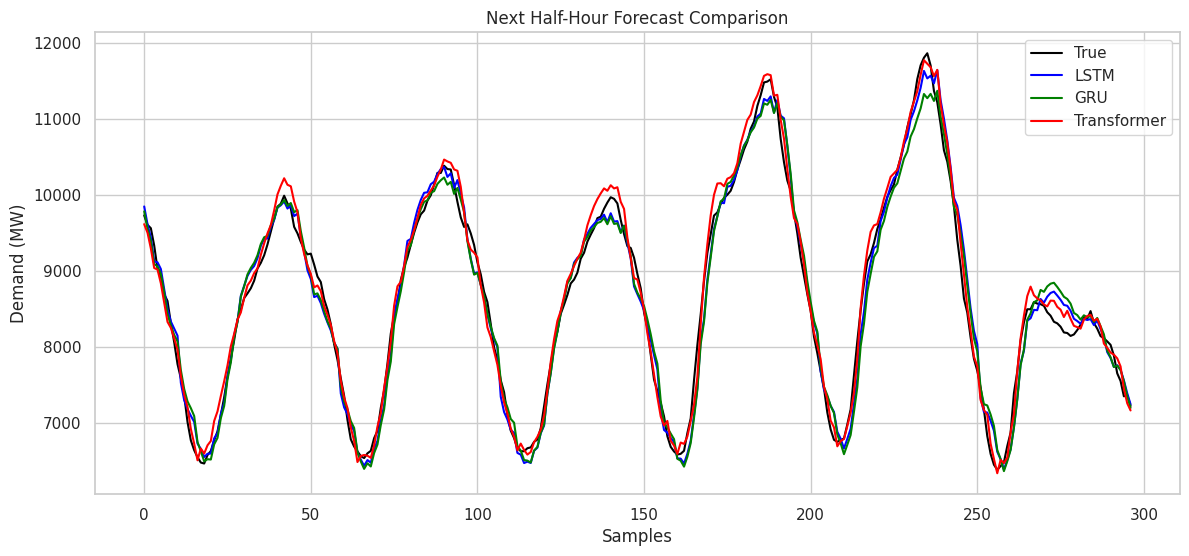

In [43]:
plt.figure(figsize=(14,6))
plt.plot(y_true_lstm[:,0], label='True', color='black')
plt.plot(y_pred_lstm[:,0], label='LSTM', color='blue')
plt.plot(y_pred_gru[:,0], label='GRU', color='green')
plt.plot(y_pred_trans[:,0], label='Transformer', color='red')
plt.title('Next Half-Hour Forecast Comparison')
plt.xlabel('Samples')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()


In [ ]:
best_model = min([(rmse_lstm,lstm_model), (rmse_gru,gru_model), (rmse_trans,transformer_model)], key=lambda x: x[0])[1]
joblib.dump(best_model, 'best_rnn_model.pkl')
